Analisis Sentimen Pada Kepuasan Pengguna Aplikasi PeduliLindungi Di Google Play Store

Deskripsi masalah dan kebutuhan masalah:

Dalam perkembangan tekonologi yang yang sangat pesat. Dengan banyaknya aplikasi dapat memudahkan semua aktivitas. Dilihat dari skor aplikasi tersebut masuk dalam peringkat teratas
dan mendapat skor tertinggi, tetapi hal tersebut tidak dapat
dijadikan sebagai tolak ukur kepuasan karena masih terdapat
pandangan yang negatif terhadap aplikasi, sebagian pengguna
menganggap bahwa banyak aplikasi seringkali error pada saat
diakses dan digunakan, kemudian masalah yang muncul seperti
jaringan yang digunakan pengguna tidak stabil. Untuk melakukan
analisis mengenai hal tersebut diperlukan pendekatan analisis
sentimen untuk mengkategorikan komentar pengguna menjadi
positif atau negatif . untuk data dalam menganalisa komentar positif
dan negatif terhadap kepuasan pengguna aplikasi di Google Play
Store.

**Mengambil Data Set dari Play Store**

In [ ]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, re
from google_play_scraper import app
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Scrape desired number of reviews
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.telkom.tracencare',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=10000,
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

LANGKAH KE 1 

MEMBACA DATASET

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,ed5229c6-2318-40c9-8fb0-20dd8ba63d4f,William Gunawan,https://play-lh.googleusercontent.com/a/ALm5wu...,Wiliam gunawan,5,0,4.5.8,2022-11-30 10:11:40,"Halo Kak,\n\nTerima kasih atas dukungan Anda.\...",2022-11-30 13:19:32
1,d32fe60f-335a-4cfc-a8da-20530bd0d605,Wahyu Wahyu,https://play-lh.googleusercontent.com/a/ALm5wu...,"Sangat buruk, apk sampah, ga bermutu, bikin ke...",1,0,None,2022-11-30 09:50:12,"Halo Kak, Jika memiliki pertanyaan umum/kendal...",2022-11-30 12:14:50
2,1e0b17d1-b8a6-476b-a432-620630a8a1eb,Tony Kurniawan,https://play-lh.googleusercontent.com/a/ALm5wu...,Pelayanan BPJS sangat memuaskan Alhamdulillah ...,5,0,None,2022-11-30 09:23:58,"Halo Kak, Jika memiliki pertanyaan umum/kendal...",2022-11-30 12:13:59
3,b2c4ebee-6bff-4cb7-b7f4-f91d684b2dbc,Muhammad putra Suta wijaya,https://play-lh.googleusercontent.com/a-/ACNPE...,Kpntol,1,0,4.4.1,2022-11-30 09:21:48,"Halo Kak,\n\nJika memiliki pertanyaan umum/ken...",2022-11-30 12:13:05
4,be8ee0b0-6f42-4f73-b9d6-c7c2ac378650,Andi Satriyadi,https://play-lh.googleusercontent.com/a/ALm5wu...,Ini aplikasi bagaimana sih saya ganti nomor hp...,1,0,None,2022-11-30 09:08:12,"Halo Kak,\n\nMohon maaf atas ketidaknyamananny...",2022-11-30 12:08:14


In [ ]:
len(df_busu.index) #banyak data yang di dapat

10000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
0,William Gunawan,5,2022-11-30 10:11:40,Wiliam gunawan
1,Wahyu Wahyu,1,2022-11-30 09:50:12,"Sangat buruk, apk sampah, ga bermutu, bikin ke..."
2,Tony Kurniawan,5,2022-11-30 09:23:58,Pelayanan BPJS sangat memuaskan Alhamdulillah ...
3,Muhammad putra Suta wijaya,1,2022-11-30 09:21:48,Kpntol
4,Andi Satriyadi,1,2022-11-30 09:08:12,Ini aplikasi bagaimana sih saya ganti nomor hp...


In [ ]:
#Jalankan code ini untuk mengurutkan data sesuai tanggal

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
0,William Gunawan,5,2022-11-30 10:11:40,Wiliam gunawan
1,Wahyu Wahyu,1,2022-11-30 09:50:12,"Sangat buruk, apk sampah, ga bermutu, bikin ke..."
2,Tony Kurniawan,5,2022-11-30 09:23:58,Pelayanan BPJS sangat memuaskan Alhamdulillah ...
3,Muhammad putra Suta wijaya,1,2022-11-30 09:21:48,Kpntol
4,Andi Satriyadi,1,2022-11-30 09:08:12,Ini aplikasi bagaimana sih saya ganti nomor hp...


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #get userName, rating, date-time, and reviews only

In [ ]:
my_df

,userName,score,at,content
0,William Gunawan,5,2022-11-30 10:11:40,Wiliam gunawan
1,Wahyu Wahyu,1,2022-11-30 09:50:12,"Sangat buruk, apk sampah, ga bermutu, bikin ke..."
2,Tony Kurniawan,5,2022-11-30 09:23:58,Pelayanan BPJS sangat memuaskan Alhamdulillah ...
3,Muhammad putra Suta wijaya,1,2022-11-30 09:21:48,Kpntol
4,Andi Satriyadi,1,2022-11-30 09:08:12,Ini aplikasi bagaimana sih saya ganti nomor hp...
...,...,...,...,...
9995,Helischa sri rahayu,5,2022-09-10 08:15:44,Suxses
9996,ewako 222,5,2022-09-10 08:11:11,Siap
9997,sukardi masril,5,2022-09-10 08:10:30,"Sangat bagus Mantap,👌👌👌👌👌"
9998,Ujang Salam,4,2022-09-10 08:01:27,Lumayan aja. ......


In [ ]:
my_df.to_csv("scrapped_data.csv", index = False)  #Untuk menyimpan data dari play store ke dalam bentuk csv

In [ ]:
df=pd.read_csv('scrapped_data.csv') #Untuk membaca file csv
df.head() #Untuk menampilkan data teratas

,userName,score,at,content
0,William Gunawan,5,2022-11-30 10:11:40,Wiliam gunawan
1,Wahyu Wahyu,1,2022-11-30 09:50:12,"Sangat buruk, apk sampah, ga bermutu, bikin ke..."
2,Tony Kurniawan,5,2022-11-30 09:23:58,Pelayanan BPJS sangat memuaskan Alhamdulillah ...
3,Muhammad putra Suta wijaya,1,2022-11-30 09:21:48,Kpntol
4,Andi Satriyadi,1,2022-11-30 09:08:12,Ini aplikasi bagaimana sih saya ganti nomor hp...


LANGKAH KE 2

ANALISIS DATA

In [ ]:
df.head(10) #Untuk menampilkan 10 data teratas 

,userName,score,at,content
0,William Gunawan,5,2022-11-30 10:11:40,Wiliam gunawan
1,Wahyu Wahyu,1,2022-11-30 09:50:12,"Sangat buruk, apk sampah, ga bermutu, bikin ke..."
2,Tony Kurniawan,5,2022-11-30 09:23:58,Pelayanan BPJS sangat memuaskan Alhamdulillah ...
3,Muhammad putra Suta wijaya,1,2022-11-30 09:21:48,Kpntol
4,Andi Satriyadi,1,2022-11-30 09:08:12,Ini aplikasi bagaimana sih saya ganti nomor hp...
5,Johnny Sins,1,2022-11-30 08:49:20,Sangat menyebalkan karena lelet sekali membuka...
6,Kino Yamakashi,1,2022-11-30 08:47:57,"periksa sertivikat aj ribet, mikirlahhhhh"
7,Lulu Sintang,5,2022-11-30 08:45:18,Terbaikk🥰
8,Nana Supriatna,5,2022-11-30 08:43:43,Sertifikat nya tidak bisa dilihat
9,Samsul Hadi,1,2022-11-30 08:41:55,aplikasi gk guna jancuukk... Gk jelas.... Apli...


In [ ]:
df.tail(10) #Untuk menampilkan 10 data terbawah

,userName,score,at,content
9990,Abdul Halim,1,2022-09-10 08:46:00,Kenapa setiap check in selalu gagal ?? Padahal...
9991,Budak Angon,5,2022-09-10 08:39:50,Ok
9992,Patra Wangsa,5,2022-09-10 08:38:38,Ok
9993,Yusriell Majid,3,2022-09-10 08:33:08,Bagus
9994,Rendy Putra,4,2022-09-10 08:25:52,Sangat Membantu
9995,Helischa sri rahayu,5,2022-09-10 08:15:44,Suxses
9996,ewako 222,5,2022-09-10 08:11:11,Siap
9997,sukardi masril,5,2022-09-10 08:10:30,"Sangat bagus Mantap,👌👌👌👌👌"
9998,Ujang Salam,4,2022-09-10 08:01:27,Lumayan aja. ......
9999,lydia nurkumalawati,5,2022-09-10 08:00:45,"Sudah sangat bagus, tapi tolong dikurangi pemb..."


In [ ]:
df.info() #Untuk melihat info data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  10000 non-null  object
 1   score     10000 non-null  int64 
 2   at        10000 non-null  object
 3   content   10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [ ]:
df.describe() #Untuk men deskripsikan data

,score
count,10000.000000
mean,3.208300
std,1.826484
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
df.describe(include='all') #Untuk menampilkan deskripsi semua data

,userName,score,at,content
count,10000,10000.000000,10000,10000
unique,9915,NaN,9984,7185
top,Pengguna Google,NaN,2022-09-15 10:15:46,Ok
freq,6,NaN,2,509
mean,NaN,3.208300,NaN,NaN
std,NaN,1.826484,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN
50%,NaN,4.000000,NaN,NaN
75%,NaN,5.000000,NaN,NaN


In [ ]:
df.mean() #Untuk melihat nilai mean pada data

score    3.2083
dtype: float64

LANGKAH KE 3

MELIHAT VARIABEL SCORE

In [ ]:
df["score"].value_counts() #Untuk melihat banyaknya jumlah data sesuai kolom score

5    4525
1    3598
4     764
3     578
2     535
Name: score, dtype: int64

In [ ]:
#Untuk label in positif dan negatif
label = []
for index, row in df.iterrows():
    if row["score"] == 5:
        label.append(1)
    else:
        label.append(0)

df["label"] = label
df = df.drop(columns=['score'])
df

,userName,at,content,label
0,William Gunawan,2022-11-30 10:11:40,Wiliam gunawan,1
1,Wahyu Wahyu,2022-11-30 09:50:12,"Sangat buruk, apk sampah, ga bermutu, bikin ke...",0
2,Tony Kurniawan,2022-11-30 09:23:58,Pelayanan BPJS sangat memuaskan Alhamdulillah ...,1
3,Muhammad putra Suta wijaya,2022-11-30 09:21:48,Kpntol,0
4,Andi Satriyadi,2022-11-30 09:08:12,Ini aplikasi bagaimana sih saya ganti nomor hp...,0
...,...,...,...,...
9995,Helischa sri rahayu,2022-09-10 08:15:44,Suxses,1
9996,ewako 222,2022-09-10 08:11:11,Siap,1
9997,sukardi masril,2022-09-10 08:10:30,"Sangat bagus Mantap,👌👌👌👌👌",1
9998,Ujang Salam,2022-09-10 08:01:27,Lumayan aja. ......,0


In [ ]:
df['label'].value_counts() #Untuk melihat banyaknya data sesuai label diatas

0    5475
1    4525
Name: label, dtype: int64

In [ ]:
df_preprocessed = df.copy() 
df_preprocessed = df_preprocessed.drop(columns=['userName', 'at']) #Untuk menghapus kolom username dan at
df_preprocessed.head()

,content,label
0,Wiliam gunawan,1
1,"Sangat buruk, apk sampah, ga bermutu, bikin ke...",0
2,Pelayanan BPJS sangat memuaskan Alhamdulillah ...,1
3,Kpntol,0
4,Ini aplikasi bagaimana sih saya ganti nomor hp...,0


In [ ]:
s_1 = df_preprocessed[df_preprocessed['label']==0].sample(5000,replace=True)
s_2 = df_preprocessed[df_preprocessed['label']==1].sample(5000,replace=True)
df_preprocessed = pd.concat([s_1, s_2])

print(df_preprocessed.shape)
print(df_preprocessed['label'].value_counts(normalize=True)) #Untuk me normalisasi data

(10000, 2)
0    0.5
1    0.5
Name: label, dtype: float64


LANGKAH KE 4

MEMBUAT VISUALISASI DATA

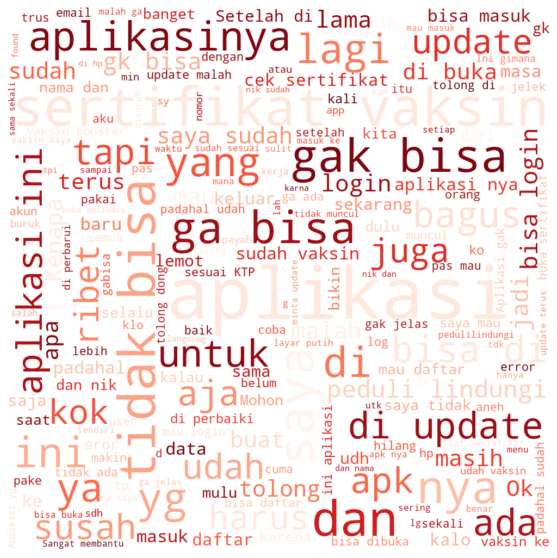

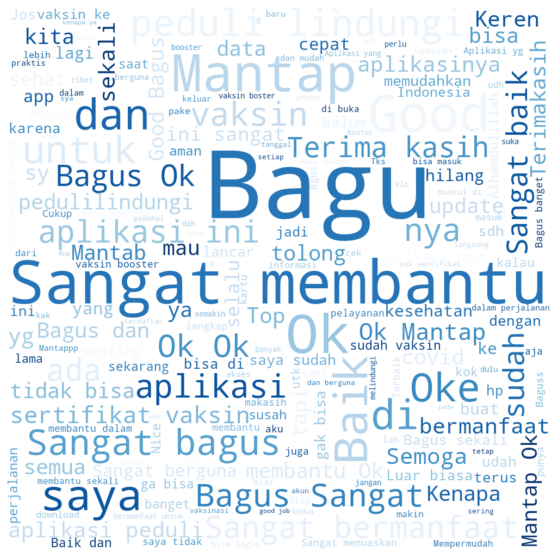

In [ ]:
# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["label"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["label"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["content"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#Untuk mem visualisasikan data ke dalam bentuk bar chart
def plotColumnScore(df_preprocessed, nGraphShown, nGraphPerRow):
    nunique = df_preprocessed.nunique()
    df_preprocessed = df_preprocessed[[col for col in df_preprocessed if nunique[col] > 1 and nunique[col] <50]]
    nRow, nCol = df_preprocessed.shape
    columnNames = list(df_preprocessed)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize= (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df_preprocessed.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]}')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
nRowsRead = 10000
df1 = pd.read_csv('scrapped_data.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'scrapped_data.csv'
nRow, nCol = df1.shape
print(f'Ada {nRow} baris dan {nCol} kolom')

Ada 10000 baris dan 4 kolom


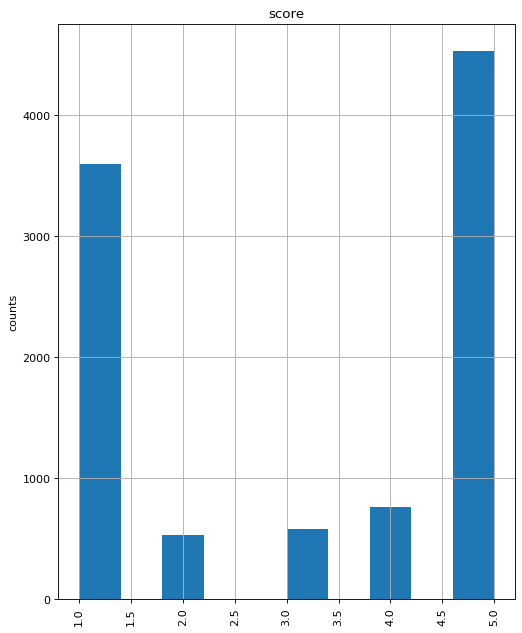

In [ ]:
plotColumnScore(df1, 10, 5)

LANGKAH KE 5

PRE PROCESSING DATA

In [ ]:
wf = wordcloud.words_

In [ ]:
def cleansing(data):
    # lower text
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [ ]:
# Menjalankan cleansing data
review = []
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["content"]))
    
df_preprocessed["content"] = review
df_preprocessed.head()

,content,label
886,kor si aja nomer 1 bikin apk gini aja ga seb...,0
8672,halo aku mau login ke akunku kok nggak bisa i...,0
6676,aplikasi kebanyakan perbaruan menghabiskan pe...,0
4214,sangat sangat sangat buruk kenapa nomer nik s...,0
1744,susah untuk masik apk mengahambat masuk ke t...,0


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.4 MB/s 


In [ ]:
# import library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopttword = factory.create_stop_word_remover()

In [ ]:
# lakukan pada data

review = []
for index, row in df_preprocessed.iterrows():
    review.append(stopttword.remove(row["content"]))
    
df_preprocessed["content"] = review
df_preprocessed.head()

,content,label
886,kor si aja nomer 1 bikin apk gini aja ga seb...,0
8672,halo aku mau login akunku kok bisa kenapa se...,0
6676,aplikasi kebanyakan perbaruan menghabiskan pe...,0
4214,sangat sangat sangat buruk nomer nik bisa dip...,0
1744,susah masik apk mengahambat masuk tempat yg ...,0


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'Error mulu, masukin data pribadi aja gk bisa'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

error mulu masukin data pribadi aja gk bisa


In [ ]:
# implementasi pada data
review = []
counter = 0
for index, row in df_preprocessed.iterrows():
    counter+=1
    print (counter)
    review.append(stemmer.stem(row["content"]))
    
df_preprocessed["content"] = review
df_preprocessed.head(10000)

Output streaming akan dipotong hingga 5000 baris terakhir.
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5

,content,label
886,kor si aja nomer 1 bikin apk gin aja ga bagus ...,0
8672,halo aku mau login akun kok bisa kenapa selalu...,0
6676,aplikasi banyak baru habis simpan,0
4214,sangat sangat sangat buruk nomer nik bisa paka...,0
1744,susah masik apk mengahambat masuk tempat yg ku...,0
...,...,...
3967,baik,1
9839,sangat bagus aplikasi peduli lindung sangat ma...,1
1540,good,1
4857,oke,1


LANGKAH KE 6

MODELING DATA DAN EVALUASI DATA

In [ ]:
#Untuk meng evaluasi data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_preprocessed['content'], df_preprocessed['label'], 
                                                    test_size=0.1, stratify=df_preprocessed['label'], random_state=30)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
          'Scan barcode satu kali',
          'Scan barcode dua kali',
          'Scan barcode tiga kali',
          'Scan barcode lagi']

vectorizer = TfidfVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.37350242, 0.        , 0.45684708, 0.        , 0.71573922,
        0.37350242, 0.        ],
       [0.37350242, 0.71573922, 0.45684708, 0.        , 0.        ,
        0.37350242, 0.        ],
       [0.37350242, 0.        , 0.45684708, 0.        , 0.        ,
        0.37350242, 0.71573922],
       [0.41988018, 0.        , 0.        , 0.8046125 , 0.        ,
        0.41988018, 0.        ]])

In [ ]:
# implementasi pada data
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(9000, 4521)
(1000, 4521)


In [ ]:
def preprocess_data(data):
    # cleansing data
    data = cleansing(data)
    
    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    # count vectorizer
    data = vectorizer.transform([data])
    
    return data

In [ ]:
from sklearn import svm #Menggunakan metode svm dari sklearn
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel="linear")

In [ ]:
# lakukan prediksi pada data test
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

In [ ]:
# import library evaluasi
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [ ]:
# f1_score
print("f1 score hasil prediksi adalah: ")
print(f1_score(y_test, predict))

# accuracy score
print("accuracy score hasil prediksi adalah: ")
print(accuracy_score(y_test, predict))

# precision score
print("precision score hasil prediksi adalah: ")
print(precision_score(y_test, predict))

# recall score
print("recall score hasil prediksi adalah: ")
print(recall_score(y_test, predict))

f1 score hasil prediksi adalah: 
0.8865586272640611
accuracy score hasil prediksi adalah: 
0.881
precision score hasil prediksi adalah: 
0.8469945355191257
recall score hasil prediksi adalah: 
0.93


In [ ]:
# confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
tn, fp, fn, tp

(416, 84, 35, 465)

In [ ]:
review_positif = "Sangat bagus, dan bermanfaat"
review_negatif = "Menyusahkan dan tidak ada solusi"

In [ ]:
clf.predict(preprocess_data(review_positif)) == 1

array([ True])

In [ ]:
clf.predict(preprocess_data(review_negatif)) == 1

array([False])

In [ ]:
review_teks = input('Masukkan review anda: ')
if (clf.predict(preprocess_data(review_teks)) == 1):
  print('Review anda mengandung Komentar Positif')
else:
  print('Review anda mengandung Komentar Negatif')

Review anda mengandung Komentar Positif
